In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_66246_I')

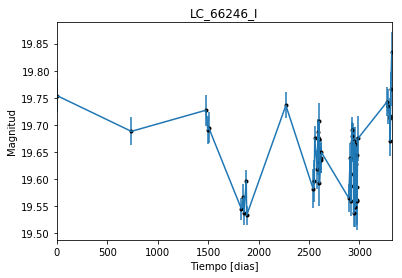

In [2]:
data = np.genfromtxt('LC_66246_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_66246_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

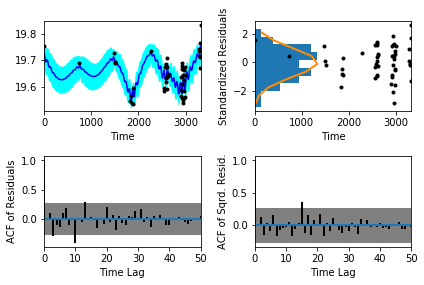

In [5]:
sample.assess_fit()

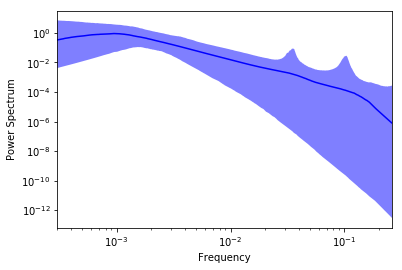

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_66246_I')

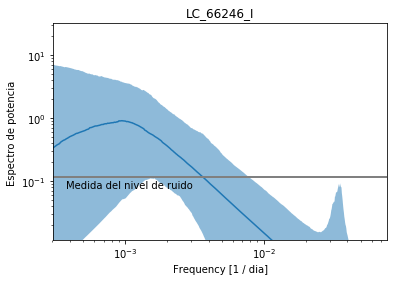

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_66246_I')

Text(0.5,1,'Prediccion , valor esperado LC_66246_I')

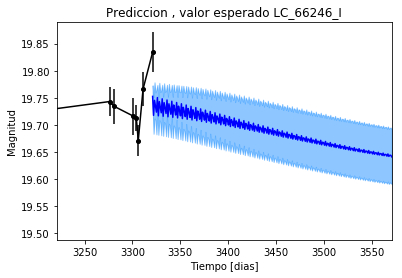

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_66246_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_66246_I')

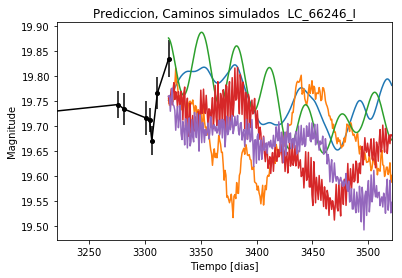

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_66246_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_66246_I')

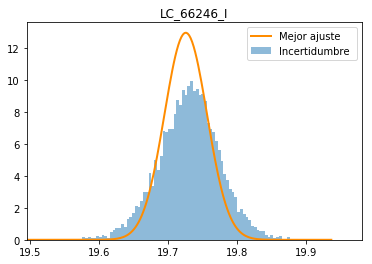

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_66246_I')

Text(0.5,1,'Interpolacion, camino simulado LC_66246_I')

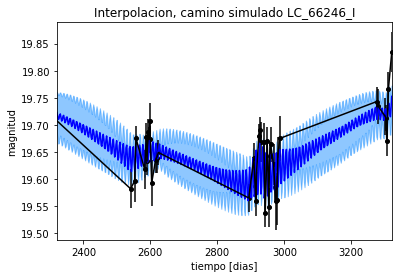

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66246_I')

Text(0.5,1,'Interpolacion, camino simulado LC_66246_I')

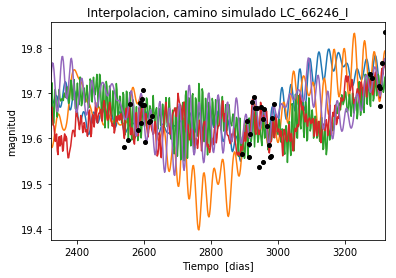

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66246_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 774.276453696
Median: 0.0045568502079
Standard deviation: 0.0691334051642
68% credibility interval: [ 0.00097183  0.02895864]
95% credibility interval: [ 0.00039292  0.25986826]
99% credibility interval: [  3.13505983e-04   4.60324135e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 415.134687636
Median: 0.00385421639885
Standard deviation: 0.0448942401374
68% credibility interval: [ 0.00079929  0.01835523]
95% credibility interval: [ 0.00035836  0.15250356]
99% credibility interval: [ 0.00030833  0.29700778]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 362.77393284
Median: 0.000878024135754
Standard deviation: 0.11249

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 115.168454506
Median: 100.223296457
Standard deviation: 3.07292006231
68% credibility interval: [  97.08941745  103.64327467]
95% credibility interval: [  94.25201843  105.68107585]
99% credibility interval: [  92.15154694  106.63829863]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 320.142476171
Median: 0.137646365367
Standard deviation: 0.999783579758
68% credibility interval: [ 0.03073018  1.47037824]
95% credibility interval: [ 0.0119361   3.36320066]
99% credibility interval: [ 0.00940862  4.8879619 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 79.3096999817
Median: 0.510672546751
Standard deviation: 2.99503645725
68% credibility interval: [ 0.05727493  6.2892577 ]
95% credibility interval: [  8.26915637e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0315763
Median: 4.75129043563e+17
Standard deviation: 2.44668233383e+149
68% credibility interval: [  5.05282655e-21   5.84617406e+68]
95% credibility interval: [  3.42644656e-062   5.22495038e+124]
99% credibility interval: [  2.47003554e-093   3.61399131e+140]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1207.84797708
Median: 19.6648576446
Standard deviation: 0.0288325341944
68% credibility interval: [ 19.64381745  19.69033817]
95% credibility interval: [ 19.61550413  19.73408717]
99% credibility interval: [ 19.58231459  19.77740966]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 66.7311608811
Median: 0.10341178606
Standard deviation: 0.158851565228
68% credibility interval: [ 0.03192562  0.39826521]
95% credibility interval: [ 0.          0.43722482]
99% credibility interval: [ 0.          0.49607346]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 66.7311608811
Median: 0.10341178606
Standard deviation: 0.158851565228
68% credibility interval: [ 0.03192562  0.39826521]
95% credibility interval: [ 0.          0.43722482]
99% credibility interval: [ 0.          0.49607346]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 201.160608975
Median: 0.000380659219018
Standard deviation: 0.000748825271

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 115.168454506
Median: 100.223296457
Standard deviation: 3.07292006231
68% credibility interval: [  97.08941745  103.64327467]
95% credibility interval: [  94.25201843  105.68107585]
99% credibility interval: [  92.15154694  106.63829863]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 680.672054824
Median: 0.00537582529301
Standard deviation: 0.004343310642
68% credibility interval: [ 0.00333576  0.00935111]
95% credibility interval: [ 0.00221792  0.01760183]
99% credibility interval: [ 0.00165767  0.02600111]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 382.742290722
Median: 1.14793650707
Standard deviation: 0.259245166006
68% credibility interval: [ 0.93234612  1.46270455]
95% credibility interval: [ 0.78722736  1.78655309]
99% credibility interval: [ 0.70464173  1.92830289]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 681.910058296
Median: 4.90476721871e-20
Standard deviation: 0.0203518971138
68% credibility interval: [  5.80973468e-72   9.87374465e-04]
95% credibility interval: [  9.52476793e-127   4.24558200e-002]
99% credibility interval: [  1.57881185e-144   1.50070439e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 774.276453696
Median: (-0.0286315342733-0.353538421073j)
Standard deviation: 1.08851987482
68% credibility interval: [-0.18195250-0.73410889j -0.00610619-0.21919146j]
95% credibility interval: [-1.63280043+0.j         -0.00246880-0.00458391j]
99% credibility interval: [ -2.89230184e+00+0.j          -1.96981619e-03-0.00674679j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 415.134687636
Median: (-0.0242167558479+0.6449398076j)
Standard deviation: 1.03718838269
68% credibility interval: [-0.11532934+1.42527923j -0.00502210+0.05299461j]
95% credibility interval: [-0.95820811+2.74703015j -0.00225167+0.j        ]
99% credibility interval: [-1.86615493+1.24485182j -0.00193729+0.j        ]
Posterior summary for parameter ar